### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'],1)

In [5]:
# Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# APPLICATION_TYPE value counts for binning
application_type_count = application_df.APPLICATION_TYPE.value_counts()
application_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

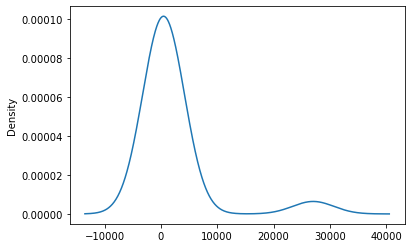

In [7]:
# Value counts of APPLICATION_TYPE visualization
application_type_count.plot.density() 

In [18]:
# Determine which values to replace if counts are less than ...?
replace_application_value = list(application_type_count[application_type_count < 500].index)

# Replace in dataframe
for app in replace_application_value:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [19]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

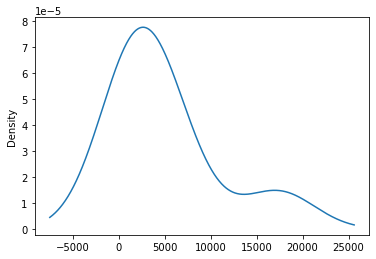

In [20]:
# Value counts of CLASSIFICATION visualization
classification_count.plot.density() 

In [21]:
# Determine which values to replace if counts are less than ..?
replace_classification_value = list(classification_count[classification_count < 500].index)

# Replace in dataframe
for cls in replace_classification_value:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [23]:
# Categorical variable lists
app_category = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
app_category

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [24]:
# OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_category]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(app_category)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(columns = app_category)
application_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Preprocessed data Split into features and target arrays
Y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Preprocessed data Split into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=78)

In [28]:
# StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [29]:
# Define model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation='sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4500      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 8,581
Trainable params: 8,581
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 824us/step - loss: 0.6915 - accuracy: 0.5312
Epoch 2/100
804/804 [==============================] - 1s 842us/step - loss: 0.6915 - accuracy: 0.5321
Epoch 3/100
804/804 [==============================] - 1s 826us/step - loss: 0.6914 - accuracy: 0.5307
Epoch 4/100
804/804 [==============================] - 1s 842us/step - loss: 0.6917 - accuracy: 0.5309
Epoch 5/100
804/804 [==============================] - 1s 822us/step - loss: 0.6914 - accuracy: 0.5280
Epoch 6/100
804/804 [==============================] - 1s 827us/step - loss: 0.6914 - accuracy: 0.5321
Epoch 7/100
804/804 [==============================] - 1s 836us/step - loss: 0.6915 - accuracy: 0.5321
Epoch 8/100
804/804 [==============================] - 1s 818us/step - loss: 0.6916 - accuracy: 0.5311
Epoch 9/100
804/804 [==============================] - 1s 835us/step - loss: 0.6915 - accuracy: 0.5304
Epoch 10/100
804/804 [==============================] - 1s 952us/step - l

804/804 [==============================] - 1s 856us/step - loss: 0.6917 - accuracy: 0.5300
Epoch 80/100
804/804 [==============================] - 1s 818us/step - loss: 0.6915 - accuracy: 0.5304
Epoch 81/100
804/804 [==============================] - 1s 787us/step - loss: 0.6915 - accuracy: 0.5310
Epoch 82/100
804/804 [==============================] - 1s 896us/step - loss: 0.6914 - accuracy: 0.5308
Epoch 83/100
804/804 [==============================] - 1s 797us/step - loss: 0.6916 - accuracy: 0.5321
Epoch 84/100
804/804 [==============================] - 1s 800us/step - loss: 0.6916 - accuracy: 0.5306
Epoch 85/100
804/804 [==============================] - 1s 806us/step - loss: 0.6915 - accuracy: 0.5321
Epoch 86/100
804/804 [==============================] - 1s 812us/step - loss: 0.6916 - accuracy: 0.5318
Epoch 87/100
804/804 [==============================] - 1s 797us/step - loss: 0.6915 - accuracy: 0.5310
Epoch 88/100
804/804 [==============================] - 1s 811us/step - loss:

In [44]:
# Evaluate model w/ test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7060 - accuracy: 0.4660
Loss: 0.7059690952301025, Accuracy: 0.4660058319568634


In [50]:
# Import checkpoint 
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#Checkpoint mapping
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callback saving the model's weights every epoch
callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch')

# Model accuracy
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

# Train  model
fit_model = nn.fit(X_train,y_train,epochs=200,callbacks=[callback])

268/268 - 0s - loss: 0.7062 - accuracy: 0.4660
Loss: 0.706209123134613, Accuracy: 0.4660058319568634
Epoch 1/200
804/804 [==============================] - 1s 896us/step - loss: 0.6917 - accuracy: 0.5309

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/200
804/804 [==============================] - 1s 862us/step - loss: 0.6915 - accuracy: 0.5321

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/200
804/804 [==============================] - 1s 904us/step - loss: 0.6914 - accuracy: 0.5310

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/200
804/804 [==============================] - 1s 987us/step - loss: 0.6914 - accuracy: 0.5310

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/200
804/804 [==============================] - 1s 892us/step - loss: 0.6914 - accuracy: 0.5311

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 

804/804 [==============================] - 1s 868us/step - loss: 0.6916 - accuracy: 0.5306

Epoch 00051: saving model to checkpoints\weights.51.hdf5
Epoch 52/200
804/804 [==============================] - 1s 874us/step - loss: 0.6916 - accuracy: 0.5311

Epoch 00052: saving model to checkpoints\weights.52.hdf5
Epoch 53/200
804/804 [==============================] - 1s 889us/step - loss: 0.6913 - accuracy: 0.5299

Epoch 00053: saving model to checkpoints\weights.53.hdf5
Epoch 54/200
804/804 [==============================] - 1s 891us/step - loss: 0.6915 - accuracy: 0.5311

Epoch 00054: saving model to checkpoints\weights.54.hdf5
Epoch 55/200
804/804 [==============================] - 1s 902us/step - loss: 0.6914 - accuracy: 0.5321

Epoch 00055: saving model to checkpoints\weights.55.hdf5
Epoch 56/200
804/804 [==============================] - 1s 882us/step - loss: 0.6916 - accuracy: 0.5321

Epoch 00056: saving model to checkpoints\weights.56.hdf5
Epoch 57/200
804/804 [===================

804/804 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5311

Epoch 00102: saving model to checkpoints\weights.102.hdf5
Epoch 103/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5321

Epoch 00103: saving model to checkpoints\weights.103.hdf5
Epoch 104/200
804/804 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5319

Epoch 00104: saving model to checkpoints\weights.104.hdf5
Epoch 105/200
804/804 [==============================] - 1s 872us/step - loss: 0.6914 - accuracy: 0.5317

Epoch 00105: saving model to checkpoints\weights.105.hdf5
Epoch 106/200
804/804 [==============================] - 1s 842us/step - loss: 0.6916 - accuracy: 0.5304

Epoch 00106: saving model to checkpoints\weights.106.hdf5
Epoch 107/200
804/804 [==============================] - 1s 854us/step - loss: 0.6916 - accuracy: 0.5321

Epoch 00107: saving model to checkpoints\weights.107.hdf5
Epoch 108/200
804/804 [=============

804/804 [==============================] - 1s 837us/step - loss: 0.6916 - accuracy: 0.5321

Epoch 00152: saving model to checkpoints\weights.152.hdf5
Epoch 153/200
804/804 [==============================] - 1s 797us/step - loss: 0.6916 - accuracy: 0.5310

Epoch 00153: saving model to checkpoints\weights.153.hdf5
Epoch 154/200
804/804 [==============================] - 1s 789us/step - loss: 0.6915 - accuracy: 0.5303

Epoch 00154: saving model to checkpoints\weights.154.hdf5
Epoch 155/200
804/804 [==============================] - 1s 783us/step - loss: 0.6914 - accuracy: 0.5321

Epoch 00155: saving model to checkpoints\weights.155.hdf5
Epoch 156/200
804/804 [==============================] - 1s 797us/step - loss: 0.6916 - accuracy: 0.5321

Epoch 00156: saving model to checkpoints\weights.156.hdf5
Epoch 157/200
804/804 [==============================] - 1s 852us/step - loss: 0.6915 - accuracy: 0.5321

Epoch 00157: saving model to checkpoints\weights.157.hdf5
Epoch 158/200
804/804 [=======

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7027 - accuracy: 0.4862
Loss: 0.7027454376220703, Accuracy: 0.48618075251579285


In [52]:
#export model
nn_refined.save('AlphabetSoupOptimization.h5')

NameError: name 'nn_refined' is not defined